# **Data Cleaning**

## **Libraries**

* **Pandas:** Data manipulation and analysis, offers the ability to clean and transform data.
* **NumPy:** Numerical libarary that allows a range of mathematical functions.
* **seaborn:** Provides a detailed interface for stastical visuals.
* **matplotlib:** Provides a range of visual options, simple or complex figures. 

Through the use of these libraries I can transform the data set so that it is suitable for analysis.

### Importing And Viewing The Dataset

I will be importing the dataset csv file so that I can view and check for any missing data or outliers to ensure that the analysis is correct and shows true information.

### Load The Dataset

In [1]:
#Import the required libraries
import pandas as pd
import numpy as np

#Display dataset for viewing
data = pd.read_csv('Data/vgsales.csv')
data

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


### Check Data Types

In [2]:
#Check the column data types.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


## Locating Missing Values

In [3]:
#Check for any missing values in the dataset.
data.isnull().sum()

index             0
Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

A way to validate these missing values can be with a heatmap 

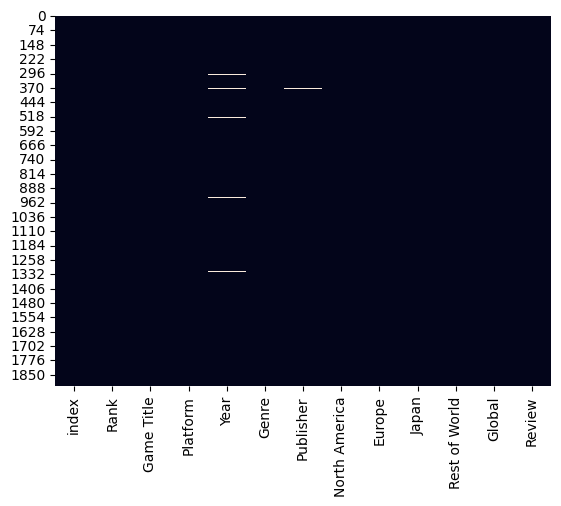

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.isnull(), cbar=False)
plt.show()


The heatmap shows that the 'Year' and 'Publisher' columns have missing values.

There appears to be two missing values in the dataset I will drop these for now unless they are critical with my analysis later. 

In [5]:
#Remove rows with missin 'Year' values.
data = data.dropna(subset=['Year'])


### Confirming The Missing Values Are Changed

In [6]:
#Check for any missing values in the dataset.
data.isnull().sum()


index            0
Rank             0
Game Title       0
Platform         0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
Review           0
dtype: int64

### Check For Duplicates

In [7]:
#Check for duplicates
data.duplicated().sum()

np.int64(0)

There are no duplicates in the dataset.

In [8]:
#Statisical summary of the dataset.
data.describe()

,index,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,950.716720,951.716720,2003.766773,1.262109,0.710517,0.320980,0.207055,2.500532,79.038243
std,550.234127,550.234127,5.895369,1.967797,1.155922,0.729295,0.345141,3.587041,10.652957
min,0.000000,1.000000,1983.000000,0.000000,0.000000,0.000000,0.000000,0.830000,30.500000
25%,474.250000,475.250000,2000.000000,0.510000,0.230000,0.000000,0.060000,1.110000,74.000000
50%,950.500000,951.500000,2005.000000,0.820000,0.440000,0.020000,0.130000,1.530000,81.095000
75%,1426.750000,1427.750000,2008.000000,1.377500,0.820000,0.307500,0.220000,2.547500,86.265000
max,1906.000000,1907.000000,2012.000000,40.430000,28.390000,7.200000,8.540000,81.120000,97.000000


The statistics of the dataset seems up to standards.

In [9]:
#Check for any 'Year' values that are out of the data range.
data[(data['Year'] < 1980) | (data['Year'] > 2024)]

,index,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review


Here I have checked to make sure that there are not dates that go before or beyond the datset's 'Year' range.  

#### Data Privacy Compliance And Ethical Considerations

Even though the dataset being used can be publily accessed it is still applicable to take ethical considerations when handling the data.

There is no private data in the dataset so I don't need to anonymise any of it. However, it is important that the data is used responsibly for its intended purpose, no bias outcomes are shown which means the analyis must be backed up with evidence. In a real world situation it is vital that a business follows key data regulations such as GDPR where the business must follow the rules of the regulation with their data practices whether that is keeping data confidential or making sure they are handling the data in the correct way.  

Now that the data transformation it us to standards I can now create a new clean data file. 

In [11]:
#Saving the cleaned dataset to a new CSV file.
data.to_csv('Data/vgsales_cleaned.csv', index=False)